# 自编程实现感知机模型（面向对象）

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class MyPerceptron:
    # 构造 MyPerceptron(感知机)类
    
    def __init__(self):
        #初始化数据w, b, η
        self.w = None
        self.b = 0
        self.l_rate = 1                               #学习率η
        
    def fit(self, X_train, y_train):
        #核心算法实现
        self.w = np.zeros(X_train.shape[1])          #用样本点的特征数初始化w，如x1=(3,3),有两个特征，则self.w=[0,0]
        i = 0
        while i < X_train.shape[0]:
            X = X_train[i]
            y = y_train[i]
            #print('w = {}, b = {}'.format(self.w, self.b))
            if y*(np.dot(self.w, X) + self.b) <= 0:           #如果y(wx+b)<= 0, 说明是误判点，更新w, b
                self.w = self.w + self.l_rate*np.dot(y, X)    # w <-- w+ηyx
                self.b = self.b + self.l_rate*y               # b <-- b+ηy
                i = 0                                         # 如果是误判点，则从头开始检测
            else:
                i += 1

In [29]:
def draw(X_train, y_train, w, b):
    # 数据可视化
    x1 = X_train[: , 0]
    x2 = X_train[: , 1]
    plt.scatter(x1, x2, c=y_train, cmap='viridis')
    plt.plot(x1, (-w[0]*x1-b)/w[1], c='r')                #曲线是w1x1+w2x2+b = 0, 所以纵坐标x2就可以表示
    #只能画到这种程度了，尚未解决的问题：怎么根据y的不同变换点的形状

In [30]:
def main():
    X_train = np.array([[3, 3], [4, 3], [1, 1]])
    y_train = np.array([1, 1, -1])                           #构建训练数据集
    
    perceptron = MyPerceptron()
    perceptron.fit(X_train, y_train)                         #构建感知机对象，对数据集继续训练
    
    draw(X_train, y_train, perceptron.w, perceptron.b)                #结果图像绘制

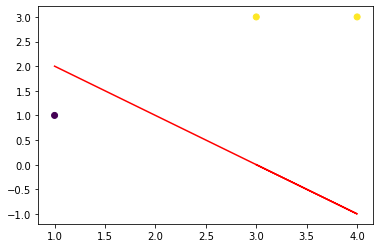

In [31]:
main()

# 调用sklearn.linear_model的Perceptron模块

In [52]:
from sklearn.linear_model import Perceptron
import numpy as np

X_train = np.array([[3, 3], [4, 3], [1, 1]])
y_train = np.array([1, 1, -1])                           #构建训练数据集

perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)
print('w:', perceptron.coef_, '\n', 'b:', perceptron.intercept_, '\n', 'n_iter:', perceptron.n_iter_)
#构建Perceptron对象，训练数据并输出结果

res = perceptron.score(X_train, y_train)
print('correct_rate:{:.0%}'.format(res))               #测试模型预测的准确率

w: [[1. 0.]] 
 b: [-2.] 
 n_iter: 9
correct_rate:100%


### Perceptron（）里可以加max_iter迭代次数，
### tol终止条件（先前损失函数值-现在损失函数值< tol），
### eta0学习率（默认1）取值在（0，1]
### penalty正则化项，防止过拟合，默认None，可以是“l2”，“l1”，“elasticnet（混合）”
####   l1使特征值更稀疏， l2使权值更均匀
### alpha正则化系数，默认0.0001

### eg: perceptron = Perceptron(penalty="l2", alpha=0.0002, eta0=0.8, max_iter=100, tol=1e-3)